In [1]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##


Note: you may need to restart the kernel to use updated packages.  environment location: C:\Users\senir\anaconda3

  added / updated specs:
    - mlxtend


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-23.1.0-py39haa95532_0 --> conda-forge::conda-23.1.0-py39hcbf5309_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Dataset: my_movies.csv

In [7]:
movies=pd.read_csv("my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [8]:
#Aprioro Algorithm for min support=0.1 & Confidence

In [9]:
df1=pd.get_dummies(movies)
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [10]:
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, Harry Potter1, V5_LOTR2, LOTR1..."
1393,0.1,"(LOTR2, V4_Green Mile, V5_LOTR2, LOTR1, V1_Six..."
1394,0.1,"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2..."
1395,0.1,"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2..."


In [11]:
frequent_itemsets = apriori(df1, min_support = 0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
1392,0.1,"(V4_Green Mile, Harry Potter1, V5_LOTR2, LOTR1...",9
1393,0.1,"(LOTR2, V4_Green Mile, V5_LOTR2, LOTR1, V1_Six...",9
1394,0.1,"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",9
1395,0.1,"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",9


In [12]:
#Rules when min_support = 0.1 and min_threshold for lift is 0.5

In [13]:
rules= association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V2_LOTR1),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(Sixth Sense),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [14]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1)","(Harry Potter1, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(LOTR1, Sixth Sense, V5_LOTR2)","(LOTR2, V4_Green Mile, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(LOTR2, V2_LOTR1, V5_LOTR2)","(LOTR1, V4_Green Mile, Harry Potter1, Sixth Se...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(LOTR2, Sixth Sense, V5_LOTR2)","(LOTR1, V4_Green Mile, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(LOTR2, LOTR1, V2_LOTR1)","(V4_Green Mile, Harry Potter1, Sixth Sense, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1622,(Gladiator),"(V1_Sixth Sense, Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
683,"(V4_Green Mile, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
218,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
44,(V1_Sixth Sense),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [15]:
import matplotlib.pyplot as plt

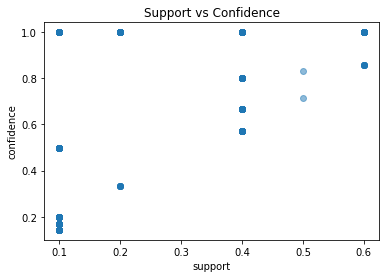

In [16]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [17]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [18]:
rules1=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(LOTR1),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63234,(V1_Sixth Sense),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63235,(V3_Harry Potter1),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63236,(V2_LOTR1),"(LOTR2, V4_Green Mile, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


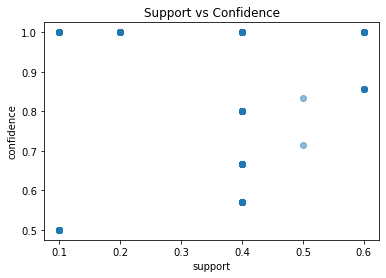

In [19]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [20]:
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.000000,0.09,inf
103,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
104,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
105,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
110,(V2_LOTR),(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1449,"(V1_Sixth Sense, Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
1482,"(V4_Green Mile, Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
1542,"(V1_Sixth Sense, V4_Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
3262,"(V1_Sixth Sense, V4_Green Mile, Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6


In [21]:
#Apriori Algorithm for min_support = 0.2

In [22]:
frequent_itemsets1 = apriori(df1, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ..."
77,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla..."
78,0.4,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Six..."
79,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla..."


In [23]:
frequent_itemsets1 = apriori(df1, min_support = 0.2, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
76,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",5
77,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",5
78,0.4,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Six...",5
79,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",5


In [24]:
#Rules when min_support = 0.2 and min_threshold for lift is 0.5

In [25]:
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V2_Patriot),"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [26]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V2_Patriot),"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


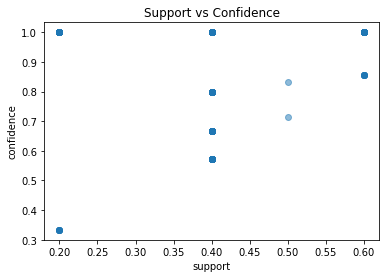

In [27]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [28]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [29]:
rules3 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
642,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
643,(V2_Patriot),"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
644,(V1_Gladiator),"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
645,(Sixth Sense),"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [30]:
rules3= rules3.sort_values(['confidence', 'lift'], ascending =[False, False])
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
22,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
29,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
30,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
31,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
460,(Gladiator),"(V1_Gladiator, Sixth Sense, Patriot, V3_Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
490,(Gladiator),"(V2_Patriot, Sixth Sense, Patriot, V3_Sixth Se...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
520,(Gladiator),"(V2_Patriot, V1_Gladiator, Sixth Sense, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
580,(Gladiator),"(V2_Patriot, V1_Gladiator, Patriot, V3_Sixth S...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


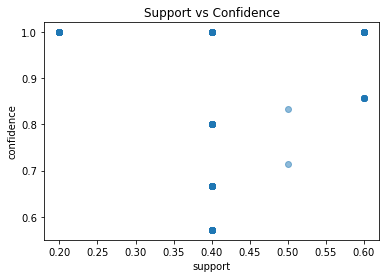

In [31]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [32]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
22,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
29,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
30,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
31,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
460,(Gladiator),"(V1_Gladiator, Sixth Sense, Patriot, V3_Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
490,(Gladiator),"(V2_Patriot, Sixth Sense, Patriot, V3_Sixth Se...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
520,(Gladiator),"(V2_Patriot, V1_Gladiator, Sixth Sense, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
580,(Gladiator),"(V2_Patriot, V1_Gladiator, Patriot, V3_Sixth S...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [33]:
#Apriori Algorithm for min_support = 0.25

In [34]:
frequent_itemsets2 = apriori(df1, min_support=0.25, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ..."
59,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla..."
60,0.4,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Six..."
61,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla..."


In [35]:
frequent_itemsets2 = apriori(df1, min_support = 0.25, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,(V1_Gladiator),1
4,0.6,(V2_Patriot),1
...,...,...,...
58,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",5
59,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",5
60,0.4,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Six...",5
61,0.4,"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",5


In [36]:
#Rules when min_support=0.25 and min_thresold for lift is 0.6

In [37]:
rules4 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.6)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(V2_Patriot),"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V1_Gladiator),"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [38]:
rules4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
505,(V3_Sixth Sense),"(V2_Patriot, V1_Gladiator, Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
496,"(V1_Gladiator, V3_Sixth Sense)","(V2_Patriot, Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
494,"(V1_Gladiator, Sixth Sense, Patriot)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
493,"(V2_Patriot, Sixth Sense, Patriot)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
491,"(V2_Patriot, V1_Gladiator, Sixth Sense)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
33,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
193,"(V2_Patriot, V1_Gladiator, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
166,"(V2_Patriot, Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
235,"(V2_Patriot, V1_Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


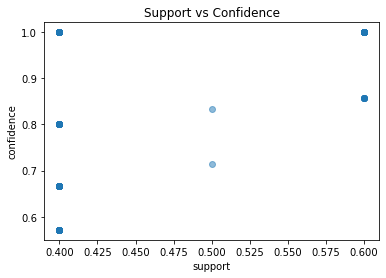

In [39]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [40]:
#Rules when min_support=0.25 and min_thresold for confidence is 0.6

In [41]:
rules5 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
574,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
575,(V2_Patriot),"(Gladiator, V3_Sixth Sense, V1_Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
576,(V1_Gladiator),"(Gladiator, V3_Sixth Sense, V2_Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
577,(Sixth Sense),"(Gladiator, V3_Sixth Sense, V2_Patriot, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [42]:
rules5 = rules5.sort_values(['confidence', 'lift'], ascending =[False, False])
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
64,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
73,"(V1_Gladiator, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
78,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
79,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
193,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
221,"(V2_Patriot, V1_Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
232,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
344,"(V2_Patriot, V1_Gladiator, Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


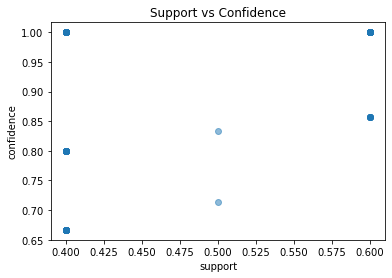

In [43]:
plt.scatter(rules5['support'], rules5['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()